In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
csv_path = "C:\\Users\Otgon\diveintocode-ml\mtfuji_data.csv"
np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
# x, lat, lng, elevation, distance
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Problem 1
visualize data

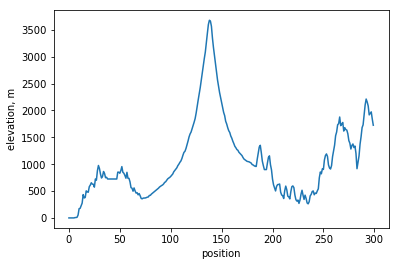

In [5]:
plt.plot(fuji[:,0],fuji[:,3])
plt.xlabel("position")
plt.ylabel("elevation, m")
plt.show()

# Problem 2
Create a function to calculate the slope of a point

In [6]:
# compute for elevation data
def compute_fuji_slope(data):
    slope = (data[1:,3]-data[:-1,3])/(data[1:,0]-data[:-1,0])
    return slope
slope_fuji = compute_fuji_slope(fuji)
print(slope_fuji.shape)

(299,)


In [35]:
# compute for given position number
# when point number is given function computes elevation diff. relative to the down point
# elevation - point and altitude of the fuji data
def compute_slope(x):
# calculate the change in elevation and postion according to the point given
    y_change = fuji[x,3] -  fuji[x-1,3]
    x_change = fuji[x,0] -  fuji[x-1,0]
    slope = y_change/x_change
    return slope
compute_slope(8)

4.9899999999999993

# Problem 3
Create a function to calculate the destination

In [42]:
def compute_dest (current,slope,alpha):
    dest = current-slope*alpha
    if(dest<0): return 0
    else: return round(dest)
alpha = 0.2
print(compute_dest(142,compute_slope(142),alpha))

177.0


# Problem 4
Creating a function to go down the mountain

In [27]:
range(len(fuji))

range(0, 300)

In [30]:
def going_down_fuji(position,alpha):
    locs = [position]
    for i in range(len(fuji)):
        position= int(compute_dest(position,compute_slope(position),alpha))
        if (locs[-1] == position):
            break
        else:
            locs.append(position)
    return locs
alpha = 0.2
path1 = going_down_fuji(136,alpha)
print("Lenght of the locations list:",len(path1))
print("Locations going down:",path1)

Lenght of the locations list: 14
Locations going down: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


# Problem 5
Visualization of the descent process

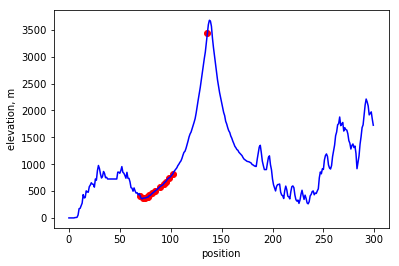

In [33]:
# Display points as dots
plt.plot(fuji[:,0],fuji[:,3],color="blue")
plt.xlabel("position")
plt.ylabel("elevation, m")
plt.scatter(path1,fuji[path1,3],color="red")
plt.show()

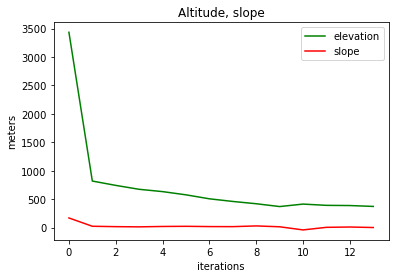

In [37]:
# Make a line graph of the altitude and slope for each iteration
plt.plot(fuji[path1,3],color="green",label="elevation")
plt.plot([compute_slope(pos) for pos in path1],color="red",label="slope")
plt.title("Altitude, slope")
plt.xlabel("iterations")
plt.ylabel("meters")
plt.legend()
plt.show()  

# Problem 6
Change of initial value

In [43]:
alpha = 0.2
point=142
path2 = going_down_fuji(point,alpha)
print("Lenght of the locations list:",len(path2))
#print("Locations going down:",path2)

Lenght of the locations list: 301


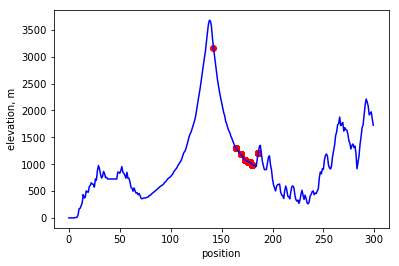

In [44]:
# Display points as dots
plt.plot(fuji[:,0],fuji[:,3],color="blue")
plt.xlabel("position")
plt.ylabel("elevation, m")
plt.scatter(path2,fuji[path2,3],color="red")
plt.show()

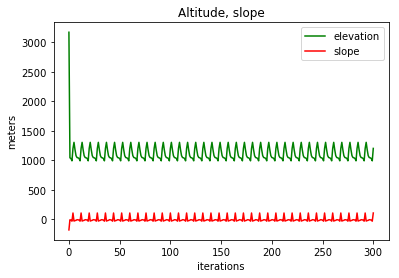

In [45]:
# Make a line graph of the altitude and slope for each iteration
plt.plot(fuji[path2,3],color="green",label="elevation")
plt.plot([compute_slope(pos) for pos in path2],color="red",label="slope")
plt.title("Altitude, slope")
plt.xlabel("iterations")
plt.ylabel("meters")
plt.legend()
plt.show() 

# Problem 7
Change hyperparameters

In [47]:
# change from 0.2 to 0.5
alpha1 = 0.5
point=136
path3 = going_down_fuji(point,alpha1)
print("Lenght of the locations list:",len(path3))

Lenght of the locations list: 4


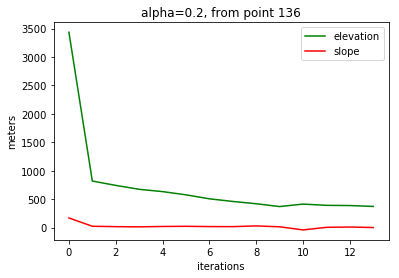

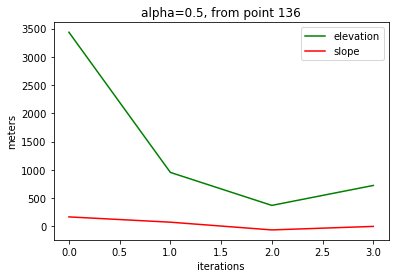

In [51]:
# Make a line graph of the altitude and slope for each iteration
# used previous variable from function in Problem 2 to compute all slopes for points in Fuji data and take first 136 points
plt.plot(fuji[path1,3],color="green",label="elevation")
plt.plot([compute_slope(pos) for pos in path1],color="red",label="slope")
plt.title("alpha=0.2, from point 136")
plt.xlabel("iterations")
plt.ylabel("meters")
plt.legend()
plt.show()  
plt.plot(fuji[path3,3],color="green",label="elevation")
plt.plot([compute_slope(pos) for pos in path3],color="red",label="slope")
plt.title("alpha=0.5, from point 136")
plt.xlabel("iterations")
plt.ylabel("meters")
plt.legend()
plt.show() 